<a href="https://colab.research.google.com/github/ale-camer/Finance/blob/master/Efficient_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install PyPortfolioOpt

In [ ]:
pip install yfinance

In [3]:
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
merval_tickers = ['ALUA.BA',	'BBAR.BA',	'BMA.BA',	'BYMA.BA',	'CEPU.BA',	'COME.BA',	'CRES.BA',	'CVH.BA',	'EDN.BA',	'GGAL.BA',	'LOMA.BA',	'MIRG.BA',	'PAMP.BA',	'SUPV.BA',	'TECO2.BA',	'TGNO4.BA',	'TGSU2.BA',	'TRAN.BA',	'TXAR.BA',	'VALO.BA',	'YPFD.BA']
merval_df = pd.DataFrame()
for i in merval_tickers:
  merval_df[i] = yf.download(i, start = dt.date.today() - dt.timedelta(days = 365 * 5), end = dt.date.today(), progress = False)['Adj Close']

In [6]:
mu = expected_returns.mean_historical_return(merval_df)
covmat = risk_models.sample_cov(merval_df)
sd = np.sqrt(np.diag(covmat))

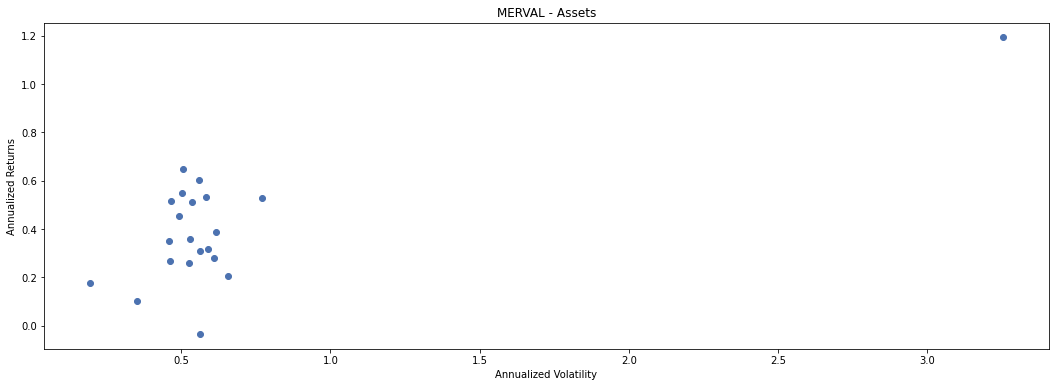

In [7]:
plt.figure(figsize = (18,6))
plt.scatter(x = sd, y = mu,  alpha = 1)
plt.title('MERVAL - Assets')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.show()

In [8]:
djia = ["UNH", "GS", "HD", "MSFT", "BA", "AMGN", "CRM", "MCD", "V", "HON", "CAT", "MMM", "DIS", "JNJ", "AXP", "JPM", "TRV", "IBM", "WMT", "PG", "NKE", "AAPL", "CVX", "MRK", "DOW", "INTC", "VZ", "KO", "WBA", "CSCO"]
djia_df = pd.DataFrame()
for i in djia:
  djia_df[i] = yf.download(i, start = dt.date.today() - dt.timedelta(days = 365 * 5), end = dt.date.today(), progress = False)['Adj Close']

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


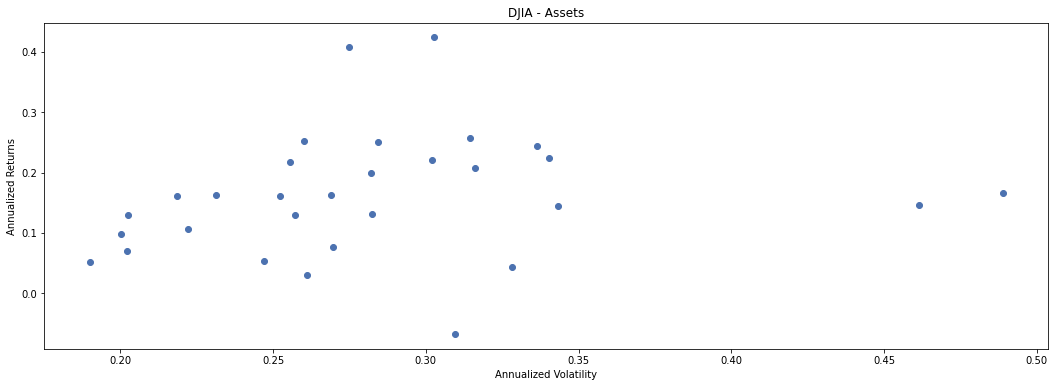

In [9]:
mu = expected_returns.mean_historical_return(djia_df)
covmat = risk_models.sample_cov(djia_df)
sd = np.sqrt(np.diag(covmat))

plt.figure(figsize = (18,6))
plt.scatter(x = sd, y = mu,  alpha = 1)
plt.title('DJIA - Assets')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.show()

In [10]:
nasdaq = ["AAPL",	"MSFT",	"AMZN",	"GOOG",	"FB",	"TSLA",	"GOOGL",	"NVDA",	"PYPL",	"ADBE",	"CMCSA",	"INTC",	"NFLX",	"CSCO",	"PEP",	"AVGO",	"TMUS",	"TXN",	"COST",	"QCOM",	"AMGN",	"INTU",	"CHTR",	"SBUX",	"AMAT",	"ISRG",	"AMD",	"BKNG",	"ZM",	"LRCX",	"MDLZ",	"MU",	"GILD",	"ADP",	"MRNA",	"MELI",	"CSX",	"FISV",	"ATVI",	"ILMN",	"ADSK",	"ADI",	"BIIB",	"JD",	"REGN",	"DOCU",	"ASML",	"NXPI",	"IDXX",	"KHC",	"KDP",	"VRTX",	"MNST",	"BIDU",	"ALGN",	"PDD",	"KLAC",	"MAR",	"WDAY",	"MRVL",	"WBA",	"EXC",	"LULU",	"EBAY",	"MTCH",	"AEP",	"ROST",	"SNPS",	"DXCM",	"EA",	"ALXN",	"MCHP",	"ORLY",	"CTAS",	"PAYX",	"CDNS",	"TEAM",	"CTSH",	"XEL",	"XLNX",	"NTES",	"CPRT",	"PCAR",	"OKTA",	"PTON",	"FAST",	"ANSS",	"SGEN",	"SWKS",	"VRSK",	"MXIM",	"SIRI",	"VRSN",	"CERN",	"DLTR",	"CDW",	"SPLK",	"TCOM",	"INCY",	"CHKP",	"FOXA",	"FOX"]
nasdaq_df = pd.DataFrame()
for i in nasdaq:
  nasdaq_df[i] = yf.download(i, start = dt.date.today() - dt.timedelta(days = 365 * 5), end = dt.date.today(), progress = False)['Adj Close']

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


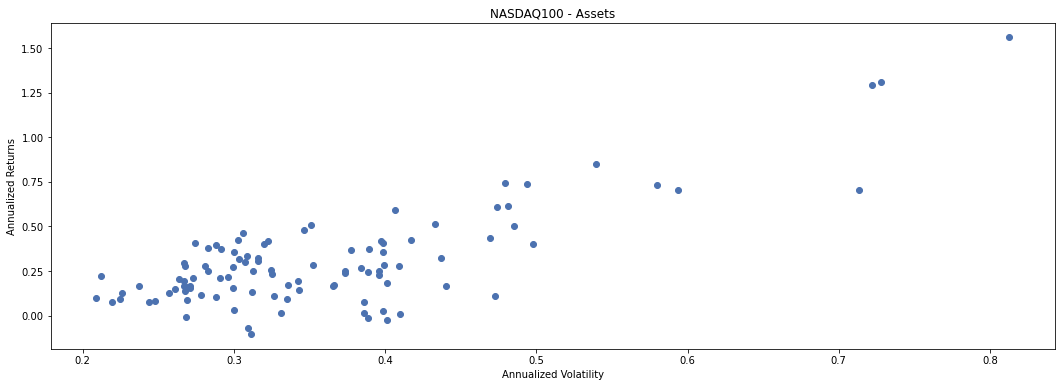

In [11]:
mu = expected_returns.mean_historical_return(nasdaq_df)
covmat = risk_models.sample_cov(nasdaq_df)
sd = np.sqrt(np.diag(covmat))

plt.figure(figsize = (18,6))
plt.scatter(x = sd, y = mu,  alpha = 1)
plt.title('NASDAQ100 - Assets')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.show()

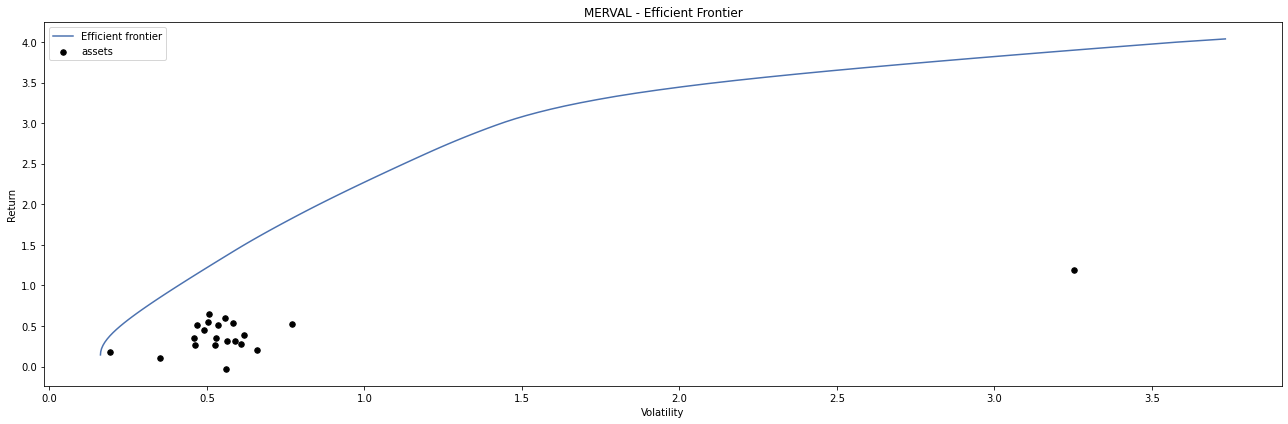

In [12]:
mu = expected_returns.mean_historical_return(merval_df)
covmat = risk_models.sample_cov(merval_df)
ef_merval = EfficientFrontier(mu, covmat, weight_bounds=(None, None))

fig, ax = plt.subplots(figsize = (18,6))
plotting.plot_efficient_frontier(ef_merval, ax = ax, show_assets = True)
plt.title('MERVAL - Efficient Frontier')
plt.tight_layout()
plt.show()

In [13]:
weights = ef_merval.max_sharpe()
ef_merval.portfolio_performance(verbose=True)

Expected annual return: 124.5%
Annual volatility: 51.1%
Sharpe Ratio: 2.40


(1.2448316904422472, 0.5110486572779317, 2.3967026876975583)

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1279: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


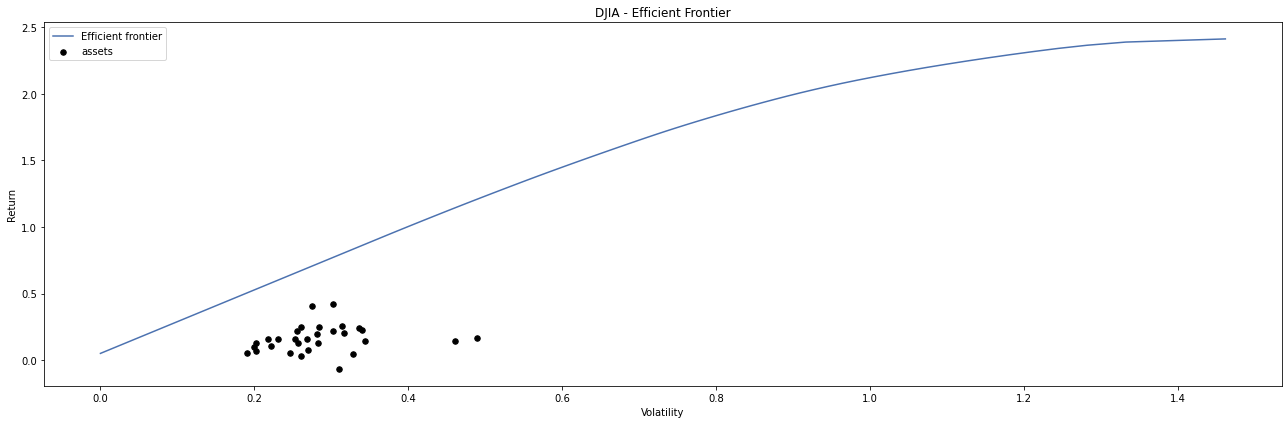

In [14]:
mu = expected_returns.mean_historical_return(djia_df)
covmat = risk_models.sample_cov(djia_df)
ef_djia = EfficientFrontier(mu, covmat, weight_bounds=(None, None))

fig, ax = plt.subplots(figsize = (18,6))
plotting.plot_efficient_frontier(ef_djia, ax = ax, show_assets = True)
plt.title('DJIA - Efficient Frontier')
plt.tight_layout()
plt.show()

In [15]:
weights = ef_djia.max_sharpe()
ef_djia.portfolio_performance(verbose=True)

Expected annual return: 5.2%
Annual volatility: 0.0%
Sharpe Ratio: 5004214.43


(0.05191550456596726, 6.377725221210572e-09, 5004214.427398817)

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


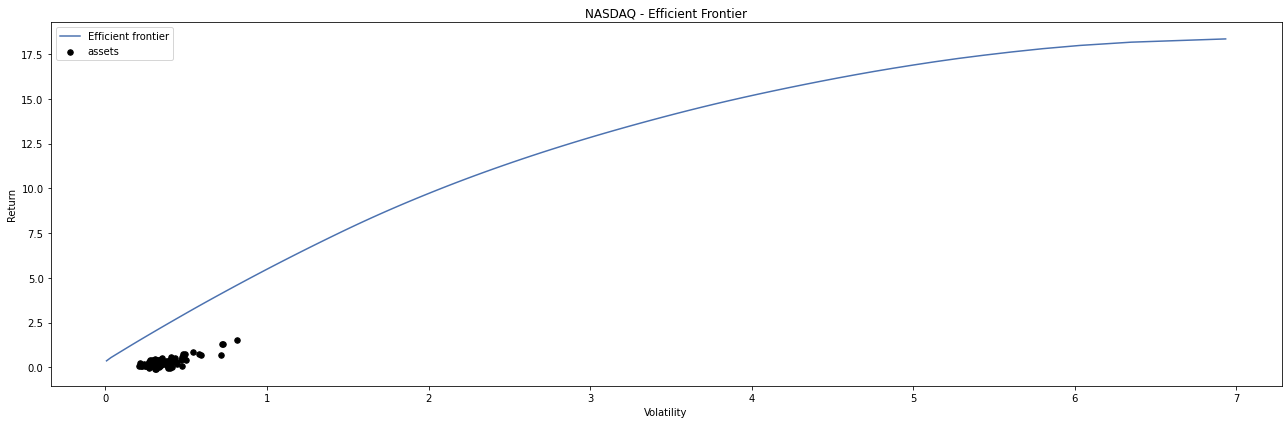

In [16]:
mu = expected_returns.mean_historical_return(nasdaq_df)
covmat = risk_models.sample_cov(nasdaq_df)
ef_nasdaq = EfficientFrontier(mu, covmat, weight_bounds=(None, None))

fig, ax = plt.subplots(figsize = (18,6))
plotting.plot_efficient_frontier(ef_nasdaq, ax = ax, show_assets = True)
plt.title('NASDAQ - Efficient Frontier')
plt.tight_layout()
plt.show()

In [17]:
weights = ef_nasdaq.max_sharpe()
ef_nasdaq.portfolio_performance(verbose=True)

Expected annual return: 37.3%
Annual volatility: 0.7%
Sharpe Ratio: 53.96


(0.3730743838533247, 0.006542902456378086, 53.962960048280145)

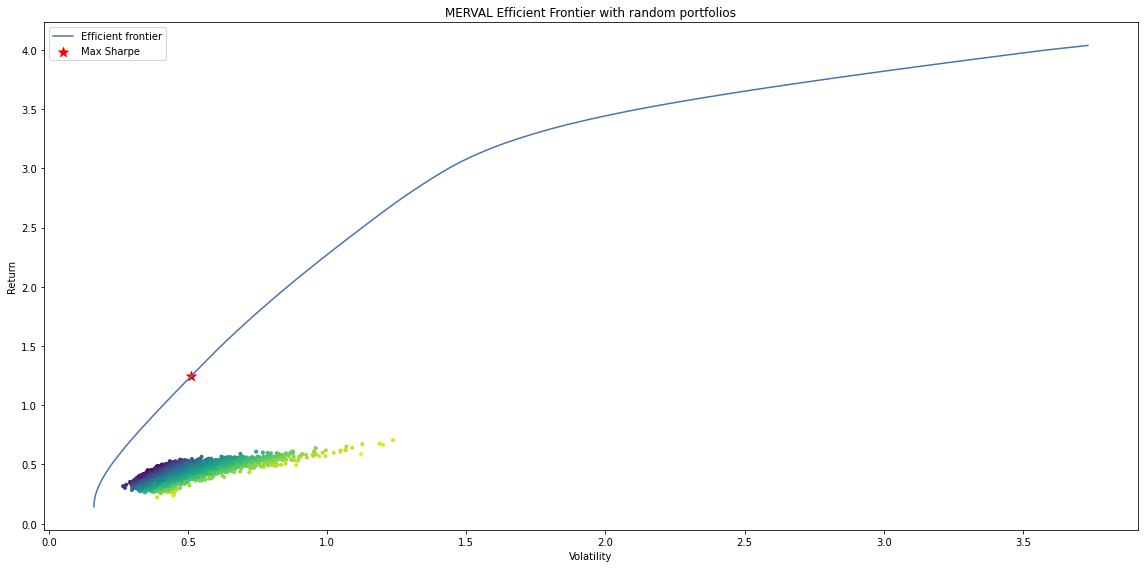

In [18]:
mu = expected_returns.mean_historical_return(merval_df)
covmat = risk_models.sample_cov(merval_df)
ef_merval = EfficientFrontier(mu, covmat, weight_bounds=(None, None))

fig, ax = plt.subplots(figsize = (16,8))
plotting.plot_efficient_frontier(ef_merval, ax = ax, show_assets= False)

# Find the tangency portfolio
ef_merval.max_sharpe()
ret_tangent, std_tangent, _ = ef_merval.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker= "*", s = 100, c = "r", label = "Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ covmat @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker = ".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("MERVAL Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1279: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


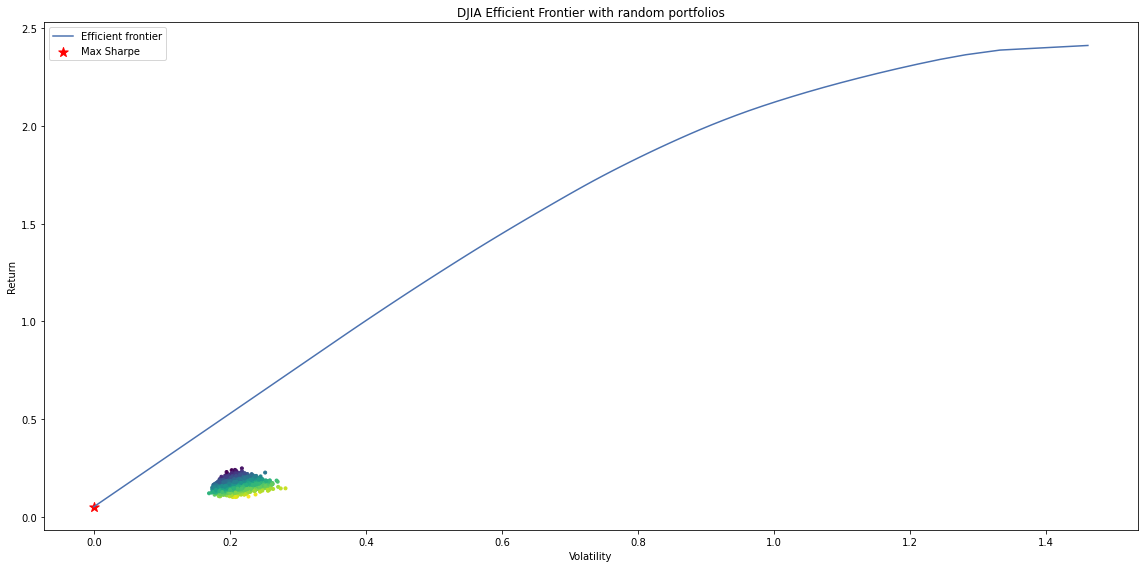

In [19]:
mu = expected_returns.mean_historical_return(djia_df)
covmat = risk_models.sample_cov(djia_df)
ef_djia = EfficientFrontier(mu, covmat, weight_bounds=(None, None))

fig, ax = plt.subplots(figsize = (16,8))
plotting.plot_efficient_frontier(ef_djia, ax = ax, show_assets= False)

#3mu = expected_returns.mean_historical_return(djia_df)
#covmat = risk_models.sample_cov(djia_df)
#ef_djia = EfficientFrontier(mu, covmat, weight_bounds=(None, None))

#fig, ax = plt.subplots(figsize = (18,6))
#plotting.plot_efficient_frontier(ef_djia, ax = ax, show_assets = True)

# Find the tangency portfolio
ef_djia.max_sharpe()
ret_tangent, std_tangent, _ = ef_djia.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker= "*", s = 100, c = "r", label = "Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ covmat @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker = ".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("DJIA Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


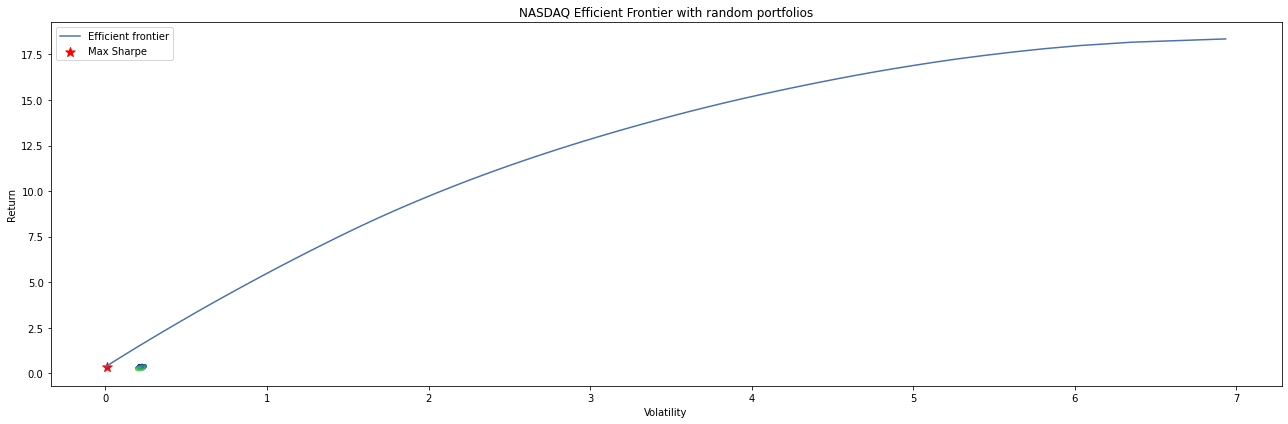

In [20]:
mu = expected_returns.mean_historical_return(nasdaq_df)
covmat = risk_models.sample_cov(nasdaq_df)
ef_nasdaq = EfficientFrontier(mu, covmat, weight_bounds=(None, None))

fig, ax = plt.subplots(figsize = (18,6))
plotting.plot_efficient_frontier(ef_nasdaq, ax = ax, show_assets = False)

# Find the tangency portfolio
ef_nasdaq.max_sharpe()
ret_tangent, std_tangent, _ = ef_nasdaq.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker= "*", s = 100, c = "r", label = "Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ covmat @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker = ".", c = sharpes, cmap = "viridis_r")

# Output
ax.set_title("NASDAQ Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()